In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df=spark.read.format('csv').option('InferSchema',True).option('Header',True).load('/FileStore/tables/WalmartSalesData.csv')

In [0]:
display(df.limit(10))

Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax_by_5_cent,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day,Year,Month
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-02-04T13:08:00.000+0000,Ewallet,522.83,4.761904762,26.1415,9.1,Afternoon,2019,01
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,2025-02-04T10:29:00.000+0000,Cash,76.4,4.761904762,3.82,9.6,Morning,2019,03
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-02-04T13:23:00.000+0000,Credit card,324.31,4.761904762,16.2155,7.4,Afternoon,2019,03
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,2019-01-27,2025-02-04T20:33:00.000+0000,Ewallet,465.76,4.761904762,23.288,8.4,Evening,2019,01
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-02-04T10:37:00.000+0000,Ewallet,604.17,4.761904762,30.2085,5.3,Morning,2019,02
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2025-02-04T18:30:00.000+0000,Ewallet,597.73,4.761904762,29.8865,4.1,Evening,2019,03
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.652,433.692,2019-02-25,2025-02-04T14:36:00.000+0000,Ewallet,413.04,4.761904762,20.652,5.8,Afternoon,2019,02
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,2025-02-04T11:38:00.000+0000,Ewallet,735.6,4.761904762,36.78,8.0,Morning,2019,02
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.626,76.146,2019-01-10,2025-02-04T17:15:00.000+0000,Credit card,72.52,4.761904762,3.626,7.2,Evening,2019,01
692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,2025-02-04T13:27:00.000+0000,Credit card,164.52,4.761904762,8.226,5.9,Afternoon,2019,02


In [0]:
from pyspark.sql.functions import *
from pyspark.sql import types

In [0]:
df.printSchema()

root
 |-- Invoice ID: string (nullable = true)
 |-- Branch: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Customer type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Product line: string (nullable = true)
 |-- Unit price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Tax 5%: double (nullable = true)
 |-- Total: double (nullable = true)
 |-- Date: date (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Payment: string (nullable = true)
 |-- cogs: double (nullable = true)
 |-- gross margin percentage: double (nullable = true)
 |-- gross income: double (nullable = true)
 |-- Rating: double (nullable = true)



In [0]:
df.createOrReplaceTempView('Walmart')

In [0]:
updated_sales = spark.sql("""
    SELECT *,
        CASE 
            WHEN time BETWEEN '00:00:00' AND '12:00:00' THEN 'Morning'
            WHEN time BETWEEN '12:00:01' AND '16:00:00' THEN 'Afternoon'
            ELSE 'Evening'
        END AS time_of_day
    FROM walmart
""")


display(updated_sales.limit(10))

Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax_by_5_cent,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day,Year,Month,time_of_day
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-02-04T13:08:00.000+0000,Ewallet,522.83,4.761904762,26.1415,9.1,Afternoon,2019,01,Afternoon
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,2025-02-04T10:29:00.000+0000,Cash,76.4,4.761904762,3.82,9.6,Morning,2019,03,Morning
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-02-04T13:23:00.000+0000,Credit card,324.31,4.761904762,16.2155,7.4,Afternoon,2019,03,Afternoon
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,2019-01-27,2025-02-04T20:33:00.000+0000,Ewallet,465.76,4.761904762,23.288,8.4,Evening,2019,01,Evening
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-02-04T10:37:00.000+0000,Ewallet,604.17,4.761904762,30.2085,5.3,Morning,2019,02,Morning
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2025-02-04T18:30:00.000+0000,Ewallet,597.73,4.761904762,29.8865,4.1,Evening,2019,03,Evening
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.652,433.692,2019-02-25,2025-02-04T14:36:00.000+0000,Ewallet,413.04,4.761904762,20.652,5.8,Afternoon,2019,02,Afternoon
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,2025-02-04T11:38:00.000+0000,Ewallet,735.6,4.761904762,36.78,8.0,Morning,2019,02,Morning
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.626,76.146,2019-01-10,2025-02-04T17:15:00.000+0000,Credit card,72.52,4.761904762,3.626,7.2,Evening,2019,01,Evening
692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,2025-02-04T13:27:00.000+0000,Credit card,164.52,4.761904762,8.226,5.9,Afternoon,2019,02,Afternoon


In [0]:

# -- How many unique cities does the data have?
unique_cities = spark.sql("""
    SELECT DISTINCT City FROM walmart
""")
unique_cities.display()



City
Naypyitaw
Mandalay
Yangon


In [0]:
from pyspark.sql.functions import when, col

df = df.withColumn('time_of_day',
                   when(col('time').between('00:00:00', '12:00:00'), 'Morning')
                   .when(col('time').between('12:00:01', '16:00:00'), 'Afternoon')
                   .otherwise('Evening'))

display(df.limit(10))



Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax_by_5_cent,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,time_of_day,Year,Month
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-02-04T13:08:00.000+0000,Ewallet,522.83,4.761904762,26.1415,9.1,Afternoon,2019,01
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,2025-02-04T10:29:00.000+0000,Cash,76.4,4.761904762,3.82,9.6,Morning,2019,03
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-02-04T13:23:00.000+0000,Credit card,324.31,4.761904762,16.2155,7.4,Afternoon,2019,03
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,2019-01-27,2025-02-04T20:33:00.000+0000,Ewallet,465.76,4.761904762,23.288,8.4,Evening,2019,01
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-02-04T10:37:00.000+0000,Ewallet,604.17,4.761904762,30.2085,5.3,Morning,2019,02
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2025-02-04T18:30:00.000+0000,Ewallet,597.73,4.761904762,29.8865,4.1,Evening,2019,03
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.652,433.692,2019-02-25,2025-02-04T14:36:00.000+0000,Ewallet,413.04,4.761904762,20.652,5.8,Afternoon,2019,02
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.78,772.38,2019-02-24,2025-02-04T11:38:00.000+0000,Ewallet,735.6,4.761904762,36.78,8.0,Morning,2019,02
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.626,76.146,2019-01-10,2025-02-04T17:15:00.000+0000,Credit card,72.52,4.761904762,3.626,7.2,Evening,2019,01
692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,2025-02-04T13:27:00.000+0000,Credit card,164.52,4.761904762,8.226,5.9,Afternoon,2019,02


In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

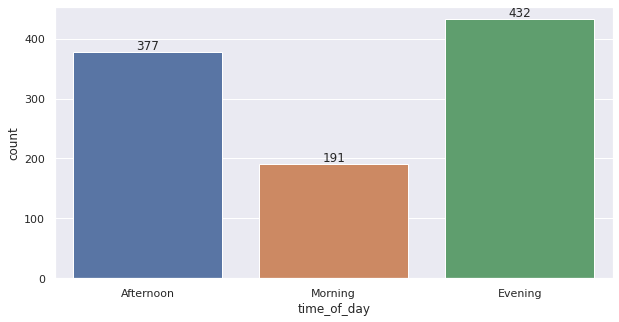

In [0]:
sample_data=df.select(col('time_of_day'))
d=sample_data.toPandas()
sns.set(rc={'figure.figsize':(10,5)})
x=sns.countplot(x='time_of_day',data=d)
for bars in x.containers:
    x.bar_label(bars)

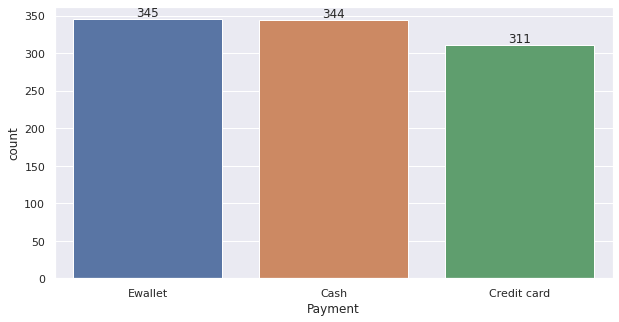

In [0]:
sm_data=df.select(col('Payment'))
a=sm_data.toPandas()
sns.set(rc={'figure.figsize':(10,5)})
x=sns.countplot(x='Payment',data=a)
for bars in x.containers:
    x.bar_label(bars)

In [0]:
# How many unique product lines does the data have?

products_types=spark.sql("""select distinct `Product line` from walmart""")

products_types.display()

Product line
Home and lifestyle
Fashion accessories
Health and beauty
Electronic accessories
Food and beverages
Sports and travel


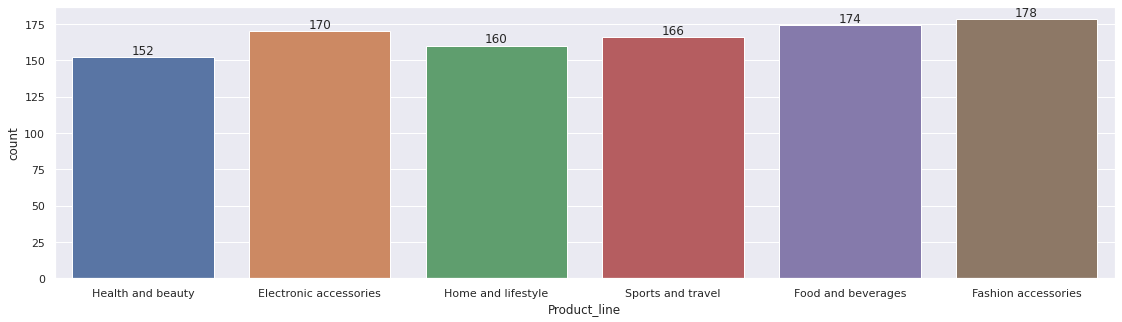

In [0]:
da = df.select(col('product line')).toPandas()
da.rename(columns={"product line": "Product_line"}, inplace=True)
sns.set(rc={'figure.figsize':(19,5)})
x = sns.countplot(x="Product_line", data=da)
for bars in x.containers:
    x.bar_label(bars)

In [0]:

# What is the most selling product line

most_selling=spark.sql("""
                       select count(`product line`) as product_sold_count,`product line` from walmart group by `product line` order by count(`product line`) desc
                       """)
most_selling.display()

product_sold_count,product line
178,Fashion accessories
174,Food and beverages
170,Electronic accessories
166,Sports and travel
160,Home and lifestyle
152,Health and beauty


In [0]:
#  What is the total revenue by month

df = df.withColumn("Year", date_format(col("Date"), "yyyy")) \
       .withColumn("Month", date_format(col("Date"), "MM"))

df.createOrReplaceTempView("walmart")


In [0]:
revenue_by_month=spark.sql("""
                           select Month,round(sum(total),2) as revenue from walmart group by Month
                           """)

revenue_by_month.display()

Month,revenue
01,116291.87
03,109455.51
02,97219.37


In [0]:
# What month had the largest COGS?

largest_congs=spark.sql(""" 
                        select Month,round(sum(cogs)) as total_cogs from walmart group by Month order by round(sum(cogs)) desc
                        """)

largest_congs.display()

Month,total_cogs
01,110754.0
03,104243.0
02,92590.0


In [0]:
# What product line had the largest revenue?

total_revenue_by_product=spark.sql(""" 
                                   select `product line`,round(sum(total),2) as product_revenue from walmart group by `product line` order by round(sum(total)) desc
                                   """)

total_revenue_by_product.display()

product line,product_revenue
Food and beverages,56144.84
Sports and travel,55122.83
Electronic accessories,54337.53
Fashion accessories,54305.9
Home and lifestyle,53861.91
Health and beauty,49193.74


Out[97]: Text(0.5, 1.0, 'Total Revenue by Product Line')

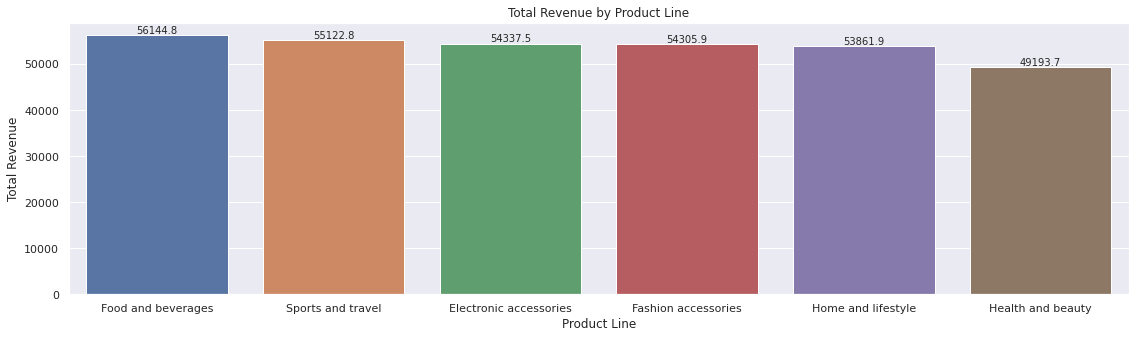

In [0]:
da = total_revenue_by_product.toPandas()
da.rename(columns={"product line": "Product_line"}, inplace=True)
plt.figure(figsize=(19, 5))
x = sns.barplot(x="Product_line", y="product_revenue", data=da)
for bars in x.containers:
    x.bar_label(bars)
plt.xticks(rotation=0)
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product Line")


In [0]:
# What is the city with the largest revenue?
total_revenue_by_city=spark.sql(""" 
                                   select city,round(sum(total),2) as product_revenue from walmart group by city order by round(sum(total)) desc
                                   """)

total_revenue_by_city.display()


city,product_revenue
Naypyitaw,110568.71
Yangon,106200.37
Mandalay,106197.67


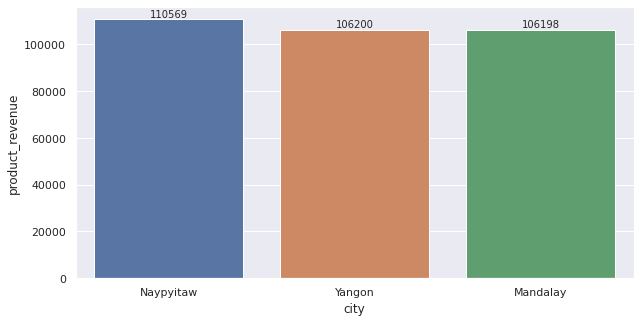

In [0]:
da=total_revenue_by_city.toPandas()
plt.figure(figsize=(10, 5))
x=sns.barplot(x='city',y='product_revenue',data=da)
for bars in x.containers:
    x.bar_label(bars)


In [0]:
# Which of the customer types brings the most revenue?

type_of_customer_revenue=spark.sql(""" 
                                   select `Customer type`,round(sum(total),2) as revenue_generated_by_type_of_customer from walmart group by 
                                   `Customer type` order by  round(sum(total),2) desc
                                   """)
type_of_customer_revenue.display()

Customer type,revenue_generated_by_type_of_customer
Member,164223.44
Normal,158743.31


In [0]:
# Which branch sold more products than average product sold?

avg_sale=spark.sql("""
                   select branch,sum(quantity) as qnt from walmart group by branch having sum(quantity)>(select avg(quantity) from walmart)
                   """)

avg_sale.display()

branch,qnt
B,1820
C,1831
A,1859


In [0]:
# What is the most common product line by gender

common_product=spark.sql("""
                         select gender, `product line`, (count(`product line`)) as count from walmart group by gender, `product line` order by count desc;
                         
                         """)

common_product.display()


gender,product line,count
Female,Fashion accessories,96
Female,Food and beverages,90
Female,Sports and travel,88
Male,Health and beauty,88
Male,Electronic accessories,86
Male,Food and beverages,84
Female,Electronic accessories,84
Male,Fashion accessories,82
Male,Home and lifestyle,81
Female,Home and lifestyle,79


In [0]:
# Which city has the largest avg tax/VAT percent?
df = df.withColumnRenamed("Tax 5%", "Tax_by_5_cent")
df.createOrReplaceTempView('walmart')

In [0]:
tax_avg=spark.sql("""
              SELECT
	city,
    ROUND(AVG(Tax_by_5_cent), 2) AS avg_tax_cent FROM walmart GROUP BY city ORDER BY avg_tax_cent DESC;
              """)

tax_avg.display()

city,avg_tax_cent
Naypyitaw,16.05
Mandalay,15.23
Yangon,14.87


In [0]:
# Which customer type pays the most in VAT?

cus_type_vat=spark.sql("""
                       SELECT `customer type`, round(AVG(Tax_by_5_cent),2) AS total_tax FROM walmart GROUP BY `customer type`
                       ORDER BY total_tax;
                       """)

cus_type_vat.display()

customer type,total_tax
Normal,15.15
Member,15.61
